In [1]:
import ROOT
import matplotlib
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange
import os,sys
from array import array
import time

from Lumi import *
from Ratio_Plot import *
from TDR_Style import *

Welcome to JupyROOT 6.24/06


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


## Control Pad

In [2]:
# 0: WZG
# 1: WZG_emm
# 2: WZG_mee
# 3: WZG_eee
# 4: WZG_mmm

# 10: ttZ
# 11: ttZ_emm
# 12: ttZ_mee
# 13: ttZ_eee
# 14: ttZ_mmm

# 20: ttG
# 21: ttG_emm
# 22: ttG_mee
# 23: ttG_eee
# 24: ttG_mmm

# 9: ZZ
# 5: ZZ_eemm
# 6: ZZ_mmee
# 7: ZZ_eeee
# 8: ZZ_mmmm     


branch = {
    "WZG_dileptonmass":{
        "name":"WZG_dileptonmass",
        "axis_name":"m_{Z} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
    "WZG_trileptonmass":{
        "name":"WZG_trileptonmass",
        "axis_name":"m_{WZ} [GeV]",
        "xbins":10,
        "xleft":100,
        "xright":500,
    },

    "ZZ_dileptonmass":{
       "name":"ZZ_mllz1",
        "axis_name":"ZZ m_{l_{Z1}l_{Z2}} [GeV]",
        "xbins":20,
        "xleft":75,
        "xright":105,  
    },
    
    "ZZ_trileptonmass":{
       "name":"ZZ_trileptonmass",
        "axis_name":"ZZ m_{lll} [GeV]",
        "xbins":20,
        "xleft":100,
        "xright":500,  
    },  
    
    "ZZ_MET":{
       "name":"ZZ_MET",
        "axis_name":"MET [GeV]",
        "xbins":20,
        "xleft":30,
        "xright":120,        
    },
    
    
    
    "ttZ_dileptonmass":{
        "name":"ttZ_dileptonmass",
        "axis_name":"m_{Z} [GeV]",
        "xbins":10,
        "xleft":75,
        "xright":105,
    },
     "ttZ_trileptonmass":{
         "name":"ttZ_trileptonmass",
         "axis_name":"m_{lll} [GeV]",
         "xbins":10,
         "xleft":100,
         "xright":500,
     },
    
    "ttG_trileptonmass":{
         "name":"ttG_trileptonmass",
         "axis_name":"m_{WZ} [GeV]",
         "xbins":10,
         "xleft":100,
         "xright":500,
     },    
    
    
#     "ttZ_lepton1_pt":{
#         "name":"ttZ_lepton1_pt",
#         "axis_name":"Leading Lep P_{T} [GeV]",
#         "xbins":20,
#         "xleft":0,
#         "xright":200,
#     },
#     "ttZ_lepton1_eta":{
#         "name":"ttZ_lepton1_eta",
#         "axis_name":"Leading Lep #eta",
#         "xbins":10,
#         "xleft":-3,
#         "xright":3,
#     },
#     "ttZ_lepton1_phi":{
#         "name":"ttZ_lepton1_phi",
#         "axis_name":"Leading Lep #phi",
#         "xbins":8,
#         "xleft":-4,
#         "xright":4,
#     },
#     "ttZ_lepton2_pt":{
#         "name":"ttZ_lepton2_pt",
#         "axis_name":"Sub Leading Lep P_{T} [GeV]",
#         "xbins":20,
#         "xleft":0,
#         "xright":200,
#     },
#     "ttZ_lepton2_eta":{
#         "name":"ttZ_lepton2_eta",
#         "axis_name":"Sub Leading Lep #eta",
#         "xbins":10,
#         "xleft":-3,
#         "xright":3,
#     },
#     "ttZ_lepton2_phi":{
#         "name":"ttZ_lepton2_phi",
#         "axis_name":"Sub Leading Lep #phi",
#         "xbins":8,
#         "xleft":-4,
#         "xright":4,
#     },
    "MET":{
        "name":"MET",
        "axis_name":"MET [GeV]",
        "xbins":20,
        "xleft":30,
        "xright":120,
    },
    "nJets":{
        "name":"nJets",
        "axis_name":"nJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
    "nbJets":{
        "name":"nbJets",
        "axis_name":"nbJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
}

channel = 9
lumi = 35.86
UpDown = 0
# 0: nominal
# 1: JESup 
# 2: JESdown
# 3: JERup
# 4: JERdown
time_total_init = time.time()

### Add Hist

In [30]:
def AddHist(file, hist, isData, xsec, lumi, channel, branch, UpDown):
    
    UpDown_map={
        0:None,
        1:"jesTotalUp",
        2:"jesTotalDown",
        3:"jerUp",
        4:"jerDown"
    }

    init_time = time.time()
    
    init_branches = ['channel_mark']
    if not "wzg_2016.root" in file:
        if ('MuonEG_Run2016H.root'in file) or (not isData):

            init_branches = ['channel_mark'
                        ,'HLT_Ele27_WPTight_Gsf'
                        ,'HLT_IsoTkMu24'
                        ,'HLT_IsoMu24'
                        ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'
                        ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'
                        ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'
                        ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'
                        ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'
                        ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'
                        ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'
                        ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL_DZ'
                        ,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ']
        else:
            init_branches = ['channel_mark'
                        ,'HLT_Ele27_WPTight_Gsf'
                        ,'HLT_IsoTkMu24'
                        ,'HLT_IsoMu24'
                        ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'
                        ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'
                        ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'
                        ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'
                        ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'
                        ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'
                        ,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ']        



        if isData:
            print('is Data')
            for branch_name in branch:
                if branch[branch_name]["name"] not in init_branches:
                    init_branches.append(branch[branch_name]["name"])
        else:
            print('is MC')
            add_branches = ['Generator_weight','puWeight','PrefireWeight','Muon_ID_Weight','Electron_ID_Weight','Electron_RECO_Weight']
            met_branches = uproot.open(file+':Events').keys(filter_name='MET_T1Smear*')
            gen_lepton_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
            gen_photon_branches= uproot.open(file+':Events').keys(filter_name='*_photon*genPartFlav')
            true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
            init_branches.extend(add_branches)
            init_branches.extend(gen_lepton_branches)
            init_branches.extend(gen_photon_branches)
            init_branches.extend(met_branches)
            for branch_name in branch:
                if branch[branch_name]["name"] not in init_branches:
                    init_branches.append(branch[branch_name]["name"])

        branches = uproot.open(file+':Events').arrays(init_branches, library='pd')

        HLT_SingleMuon1 = branches.loc[:,'HLT_IsoTkMu24'] == True
        HLT_SingleMuon2 = branches.loc[:,'HLT_IsoMu24'] == True

        HLT_DoubleMuon1 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'] == True
        HLT_DoubleMuon2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'] == True
        HLT_DoubleMuon3 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'] == True
        HLT_DoubleMuon4 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'] == True

        HLT_SingleElectron = branches.loc[:,'HLT_Ele27_WPTight_Gsf'] == True

        HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True

        HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'] == True
        HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'] == True


        comb_HLT_SingleMuon     = (HLT_SingleMuon1 | HLT_SingleMuon2)

        if 'DoubleMuon_Run2016H'in file:
            comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2)
        elif 'DoubleMuon_Run2016' in file:
            comb_HLT_DoubleMuon = (HLT_DoubleMuon3 | HLT_DoubleMuon4)
        else:
            comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2) | (HLT_DoubleMuon3 | HLT_DoubleMuon4)

        if 'MuonEG_Run2016H' in file:
            HLT_MuonEG3 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
            HLT_MuonEG4 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL_DZ'] == True
            comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2) | (HLT_MuonEG3 | HLT_MuonEG4)
        elif 'MuonEG_Run2016' in file:
            comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2)
            
        else:
            comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2)



        if 'SingleMuon' in file:
            arrays = branches.loc[comb_HLT_SingleMuon , :].copy()
        elif 'DoubleMuon' in file:
            arrays = branches.loc[~comb_HLT_SingleMuon & comb_HLT_DoubleMuon, :].copy()
        elif 'SingleElectron' in file:
            arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &   HLT_SingleElectron ,:].copy()
        elif 'MuonEG' in file:
            arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &  ~HLT_SingleElectron & comb_HLT_MuonEG,:].copy()
        elif 'DoubleEG' in file:
            arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &  ~HLT_SingleElectron & ~comb_HLT_MuonEG & HLT_DoubleEG,:].copy()
        else:
            arrays = branches.loc[comb_HLT_SingleMuon | comb_HLT_DoubleMuon | comb_HLT_MuonEG | HLT_SingleElectron |  HLT_DoubleEG ,:].copy()
            
    else:
        print('is MC')
        add_branches = ['Generator_weight','puWeight','PrefireWeight','Muon_ID_Weight','Electron_ID_Weight','Electron_RECO_Weight']
        met_branches = uproot.open(file+':Events').keys(filter_name='MET_T1Smear*')
        gen_lepton_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        gen_photon_branches= uproot.open(file+':Events').keys(filter_name='*_photon*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_lepton_branches)
        init_branches.extend(gen_photon_branches)
        init_branches.extend(met_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])

        branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
        arrays = branches[:].copy()    
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 20:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 21) & (arrays.loc[:,'channel_mark'] <= 24)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        if ((channel >= 10) and (channel <= 14)) or ((channel >= 0) and (channel <= 4)):
            MET_cut = (arrays.loc[:,'MET'] > 30)
            arrays = arrays.loc[channel_cut & MET_cut,:]
        else:
            arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (arrays.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (arrays.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttG = (arrays.loc[:,'ttG_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ttG_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ttG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (arrays.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jerDown'] > 30)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jerUp'] > 30)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jesTotalUp'] > 30)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jesTotalDown'] > 30)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        20:lep_gen_cut_ttG,
                        21:lep_gen_cut_ttG,
                        22:lep_gen_cut_ttG,
                        23:lep_gen_cut_ttG,
                        24:lep_gen_cut_ttG,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        if ((channel >= 10) and (channel <= 14)) or ((channel >= 0) and (channel <= 4)):
            if UpDown_map[UpDown]:
                MET_cut = (arrays.loc[:,f'MET_T1Smear_pt_{UpDown_map[UpDown]}'] > 30)
            else:
                MET_cut = (arrays.loc[:,f'MET_T1Smear_pt'] > 30)
            arrays = arrays.loc[channel_cut & MET_cut & lep_gen_cut,:]
        else:
            arrays = arrays.loc[channel_cut & lep_gen_cut,:]    
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        
        arrays['Muon_ID_Weight']       = arrays['Muon_ID_Weight'].apply(lambda x: 1 if x==0 else x)
        arrays['Electron_ID_Weight']   = arrays['Electron_ID_Weight'].apply(lambda x: 1 if x==0 else x)
        arrays['Electron_RECO_Weight'] = arrays['Electron_RECO_Weight'].apply(lambda x: 1 if x==0 else x)
        
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 *  arrays['PrefireWeight'] * arrays['puWeight']* arrays['Muon_ID_Weight'] * arrays['Electron_ID_Weight'] * arrays['Electron_RECO_Weight'] *  arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))

## Add Data

In [4]:
filelist_data = [
"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root"
,"/eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root"
]

hist_data = {}

for branch_name in branch:
    hist_data_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_data_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_data_temp.SetYTitle(f'events / bin')
    hist_data_temp.Sumw2()
    hist_data[branch_name] = hist_data_temp

In [5]:
for file in filelist_data:
    AddHist(file, hist_data, 1, 0, 0, channel, branch, UpDown)

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 25800.62it/s]


SumOfWeights for WZG_dileptonmass:  1.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 166765.28it/s]


SumOfWeights for WZG_trileptonmass:  1.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 162498.62it/s]


SumOfWeights for ZZ_dileptonmass:  106.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 159410.62it/s]


SumOfWeights for ZZ_trileptonmass:  101.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 83933.59it/s]


SumOfWeights for ZZ_MET:  29.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 86767.41it/s]


SumOfWeights for ttZ_dileptonmass:  1.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 99284.55it/s]


SumOfWeights for ttZ_trileptonmass:  32.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 92470.10it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 100861.21it/s]


SumOfWeights for MET:  29.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 98536.40it/s]


SumOfWeights for nJets:  106.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016B.root: 100%|██████████| 106/106 [00:00<00:00, 105180.09it/s]


SumOfWeights for nbJets:  106.0
Time cost: 2.75

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 72531.20it/s]


SumOfWeights for WZG_dileptonmass:  3.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 94071.78it/s]


SumOfWeights for WZG_trileptonmass:  3.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 98970.56it/s]


SumOfWeights for ZZ_dileptonmass:  135.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 103255.36it/s]


SumOfWeights for ZZ_trileptonmass:  128.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 95624.86it/s]


SumOfWeights for ZZ_MET:  43.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 98809.76it/s]


SumOfWeights for ttZ_dileptonmass:  2.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 87318.60it/s]


SumOfWeights for ttZ_trileptonmass:  43.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 102300.10it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 98569.54it/s]


SumOfWeights for MET:  43.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 90033.17it/s]


SumOfWeights for nJets:  135.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016C.root: 100%|██████████| 29/29 [00:00<00:00, 97620.24it/s]


SumOfWeights for nbJets:  135.0
Time cost: 2.18

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 111204.66it/s]


SumOfWeights for WZG_dileptonmass:  8.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 51854.00it/s]


SumOfWeights for WZG_trileptonmass:  8.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 63495.60it/s]


SumOfWeights for ZZ_dileptonmass:  188.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 69359.79it/s]


SumOfWeights for ZZ_trileptonmass:  181.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 61663.83it/s]


SumOfWeights for ZZ_MET:  58.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 57146.04it/s]


SumOfWeights for ttZ_dileptonmass:  5.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 63897.13it/s]


SumOfWeights for ttZ_trileptonmass:  61.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 61578.42it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 69729.65it/s]


SumOfWeights for MET:  58.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 70436.66it/s]


SumOfWeights for nJets:  188.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016D.root: 100%|██████████| 53/53 [00:00<00:00, 74696.95it/s]


SumOfWeights for nbJets:  188.0
Time cost: 2.08

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 123600.26it/s]


SumOfWeights for WZG_dileptonmass:  11.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 65754.96it/s]


SumOfWeights for WZG_trileptonmass:  11.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 65251.86it/s]


SumOfWeights for ZZ_dileptonmass:  249.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 62601.55it/s]


SumOfWeights for ZZ_trileptonmass:  239.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 62708.96it/s]


SumOfWeights for ZZ_MET:  81.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 60115.73it/s]


SumOfWeights for ttZ_dileptonmass:  5.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 78242.37it/s]


SumOfWeights for ttZ_trileptonmass:  75.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 72934.02it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 74031.41it/s]


SumOfWeights for MET:  81.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 76305.56it/s]


SumOfWeights for nJets:  249.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016E.root: 100%|██████████| 61/61 [00:00<00:00, 79729.68it/s]


SumOfWeights for nbJets:  249.0
Time cost: 2.72

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 121290.51it/s]


SumOfWeights for WZG_dileptonmass:  11.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 121177.47it/s]


SumOfWeights for WZG_trileptonmass:  11.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 124364.82it/s]


SumOfWeights for ZZ_dileptonmass:  311.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 115371.27it/s]


SumOfWeights for ZZ_trileptonmass:  301.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 132003.48it/s]


SumOfWeights for ZZ_MET:  106.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 122374.99it/s]


SumOfWeights for ttZ_dileptonmass:  6.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 126914.03it/s]


SumOfWeights for ttZ_trileptonmass:  92.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 121744.78it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 124305.38it/s]


SumOfWeights for MET:  106.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 124305.38it/s]


SumOfWeights for nJets:  311.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016F.root: 100%|██████████| 62/62 [00:00<00:00, 132474.20it/s]


SumOfWeights for nbJets:  311.0
Time cost: 2.30

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 106583.02it/s]


SumOfWeights for WZG_dileptonmass:  16.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 102095.99it/s]


SumOfWeights for WZG_trileptonmass:  16.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 114016.29it/s]


SumOfWeights for ZZ_dileptonmass:  433.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 103249.61it/s]


SumOfWeights for ZZ_trileptonmass:  421.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 85483.64it/s]


SumOfWeights for ZZ_MET:  157.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 118094.87it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 121228.40it/s]


SumOfWeights for ttZ_trileptonmass:  133.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 124684.48it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 114398.63it/s]


SumOfWeights for MET:  157.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 112685.55it/s]


SumOfWeights for nJets:  433.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016G.root: 100%|██████████| 122/122 [00:00<00:00, 124897.51it/s]


SumOfWeights for nbJets:  433.0
Time cost: 2.81

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 112862.00it/s]


SumOfWeights for WZG_dileptonmass:  25.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 112262.12it/s]


SumOfWeights for WZG_trileptonmass:  25.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 115417.03it/s]


SumOfWeights for ZZ_dileptonmass:  574.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 119522.41it/s]


SumOfWeights for ZZ_trileptonmass:  561.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 119885.84it/s]


SumOfWeights for ZZ_MET:  211.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 118945.47it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 70295.60it/s]


SumOfWeights for ttZ_trileptonmass:  170.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 77014.83it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 79875.32it/s]


SumOfWeights for MET:  211.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 81628.28it/s]


SumOfWeights for nJets:  573.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleMuon_Run2016H.root: 100%|██████████| 141/141 [00:00<00:00, 85598.04it/s]


SumOfWeights for nbJets:  574.0
Time cost: 2.60

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 12409.18it/s]


SumOfWeights for WZG_dileptonmass:  25.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 18641.35it/s]


SumOfWeights for WZG_trileptonmass:  25.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 13640.01it/s]


SumOfWeights for ZZ_dileptonmass:  576.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 14339.50it/s]


SumOfWeights for ZZ_trileptonmass:  563.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 14217.98it/s]


SumOfWeights for ZZ_MET:  211.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 13934.56it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 14146.05it/s]


SumOfWeights for ttZ_trileptonmass:  170.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 13378.96it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 14463.12it/s]


SumOfWeights for MET:  211.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 14315.03it/s]


SumOfWeights for nJets:  575.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 15196.75it/s]


SumOfWeights for nbJets:  576.0
Time cost: 2.63

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 10837.99it/s]


SumOfWeights for WZG_dileptonmass:  26.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 13662.23it/s]


SumOfWeights for WZG_trileptonmass:  26.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 13378.96it/s]


SumOfWeights for ZZ_dileptonmass:  578.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 11491.24it/s]


SumOfWeights for ZZ_trileptonmass:  565.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 15827.56it/s]


SumOfWeights for ZZ_MET:  212.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 13911.46it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 14051.27it/s]


SumOfWeights for ttZ_trileptonmass:  172.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 16416.06it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 16288.56it/s]


SumOfWeights for MET:  212.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 14742.72it/s]


SumOfWeights for nJets:  577.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 15033.35it/s]


SumOfWeights for nbJets:  578.0
Time cost: 2.02

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 3872.86it/s]


SumOfWeights for WZG_dileptonmass:  26.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]


SumOfWeights for WZG_trileptonmass:  26.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 6502.80it/s]


SumOfWeights for ZZ_dileptonmass:  579.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 7013.89it/s]


SumOfWeights for ZZ_trileptonmass:  566.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 3483.64it/s]


SumOfWeights for ZZ_MET:  212.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 6978.88it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8371.86it/s]


SumOfWeights for ttZ_trileptonmass:  173.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 6743.25it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8683.86it/s]


SumOfWeights for MET:  212.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 7639.90it/s]


SumOfWeights for nJets:  578.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8830.11it/s]


SumOfWeights for nbJets:  579.0
Time cost: 1.91

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 18137.53it/s]


SumOfWeights for WZG_dileptonmass:  27.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 12009.46it/s]


SumOfWeights for WZG_trileptonmass:  27.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 16352.06it/s]


SumOfWeights for ZZ_dileptonmass:  583.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 17549.39it/s]


SumOfWeights for ZZ_trileptonmass:  570.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 17678.84it/s]


SumOfWeights for ZZ_MET:  215.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 17403.75it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 12633.45it/s]


SumOfWeights for ttZ_trileptonmass:  173.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 19217.89it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 10518.63it/s]


SumOfWeights for MET:  215.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 20116.57it/s]


SumOfWeights for nJets:  582.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 21050.46it/s]


SumOfWeights for nbJets:  583.0
Time cost: 2.18

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 8594.89it/s]


SumOfWeights for WZG_dileptonmass:  27.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 11397.57it/s]


SumOfWeights for WZG_trileptonmass:  27.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 13486.51it/s]


SumOfWeights for ZZ_dileptonmass:  585.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 13662.23it/s]


SumOfWeights for ZZ_trileptonmass:  572.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 13025.79it/s]


SumOfWeights for ZZ_MET:  216.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 13842.59it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 12671.61it/s]


SumOfWeights for ttZ_trileptonmass:  174.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 13464.86it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 14847.09it/s]


SumOfWeights for MET:  216.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 14122.24it/s]


SumOfWeights for nJets:  584.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 15917.66it/s]


SumOfWeights for nbJets:  585.0
Time cost: 1.95

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


SumOfWeights for WZG_dileptonmass:  27.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 6574.14it/s]


SumOfWeights for WZG_trileptonmass:  27.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 6232.25it/s]


SumOfWeights for ZZ_dileptonmass:  586.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 6657.63it/s]


SumOfWeights for ZZ_trileptonmass:  573.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 7503.23it/s]


SumOfWeights for ZZ_MET:  216.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 7667.83it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]


SumOfWeights for ttZ_trileptonmass:  174.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 6177.18it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 3530.56it/s]


SumOfWeights for MET:  216.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 3398.95it/s]


SumOfWeights for nJets:  585.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 3986.98it/s]


SumOfWeights for nbJets:  586.0
Time cost: 2.34

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  27.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  27.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  586.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  573.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  216.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  10.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  174.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  216.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  585.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleMuon_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  586.0
Time cost: 2.64

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 123725.78it/s]


SumOfWeights for WZG_dileptonmass:  30.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 127292.99it/s]


SumOfWeights for WZG_trileptonmass:  30.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 140277.73it/s]


SumOfWeights for ZZ_dileptonmass:  626.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 120873.31it/s]


SumOfWeights for ZZ_trileptonmass:  612.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 117652.29it/s]


SumOfWeights for ZZ_MET:  229.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 134217.73it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 116751.68it/s]


SumOfWeights for ttZ_trileptonmass:  184.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 112372.51it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 115944.82it/s]


SumOfWeights for MET:  229.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 127875.12it/s]


SumOfWeights for nJets:  625.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016B.root: 100%|██████████| 40/40 [00:00<00:00, 129354.02it/s]


SumOfWeights for nbJets:  626.0
Time cost: 2.87

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 28149.69it/s]


SumOfWeights for WZG_dileptonmass:  30.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 33825.03it/s]


SumOfWeights for WZG_trileptonmass:  30.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 20690.72it/s]


SumOfWeights for ZZ_dileptonmass:  633.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 32513.98it/s]


SumOfWeights for ZZ_trileptonmass:  619.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 34179.43it/s]


SumOfWeights for ZZ_MET:  231.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 21748.24it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 39891.48it/s]


SumOfWeights for ttZ_trileptonmass:  184.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 40891.54it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 25288.65it/s]


SumOfWeights for MET:  231.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 41236.13it/s]


SumOfWeights for nJets:  632.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016C.root: 100%|██████████| 7/7 [00:00<00:00, 42489.33it/s]


SumOfWeights for nbJets:  633.0
Time cost: 2.36

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 82472.27it/s]


SumOfWeights for WZG_dileptonmass:  32.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 80956.24it/s]


SumOfWeights for WZG_trileptonmass:  32.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 89603.65it/s]


SumOfWeights for ZZ_dileptonmass:  654.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 96685.38it/s]


SumOfWeights for ZZ_trileptonmass:  640.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 82938.21it/s]


SumOfWeights for ZZ_MET:  241.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 83173.17it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 85848.33it/s]


SumOfWeights for ttZ_trileptonmass:  188.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 77399.28it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 90431.61it/s]


SumOfWeights for MET:  241.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 83409.45it/s]


SumOfWeights for nJets:  653.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016D.root: 100%|██████████| 21/21 [00:00<00:00, 84449.07it/s]


SumOfWeights for nbJets:  654.0
Time cost: 2.30

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 44590.61it/s]


SumOfWeights for WZG_dileptonmass:  32.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 61342.65it/s]


SumOfWeights for WZG_trileptonmass:  32.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 65344.56it/s]


SumOfWeights for ZZ_dileptonmass:  670.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 69832.32it/s]


SumOfWeights for ZZ_trileptonmass:  656.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 60295.48it/s]


SumOfWeights for ZZ_MET:  246.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 66247.64it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 68200.07it/s]


SumOfWeights for ttZ_trileptonmass:  191.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 48279.76it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 69977.96it/s]


SumOfWeights for MET:  246.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 73584.28it/s]


SumOfWeights for nJets:  669.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 73908.44it/s]


SumOfWeights for nbJets:  670.0
Time cost: 2.33

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 30954.27it/s]


SumOfWeights for WZG_dileptonmass:  32.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 34759.43it/s]


SumOfWeights for WZG_trileptonmass:  32.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 33916.20it/s]


SumOfWeights for ZZ_dileptonmass:  676.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 34053.89it/s]


SumOfWeights for ZZ_trileptonmass:  662.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 36054.19it/s]


SumOfWeights for ZZ_MET:  248.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 36419.43it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 39138.14it/s]


SumOfWeights for ttZ_trileptonmass:  191.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 39016.78it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 38896.17it/s]


SumOfWeights for MET:  248.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 38245.93it/s]


SumOfWeights for nJets:  675.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 35196.96it/s]


SumOfWeights for nbJets:  676.0
Time cost: 2.37

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 87642.17it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 45613.87it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 51328.90it/s]


SumOfWeights for ZZ_dileptonmass:  697.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 52996.62it/s]


SumOfWeights for ZZ_trileptonmass:  682.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 56498.00it/s]


SumOfWeights for ZZ_MET:  256.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 44306.03it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 42633.29it/s]


SumOfWeights for ttZ_trileptonmass:  200.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 46826.36it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 57046.88it/s]


SumOfWeights for MET:  256.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 62424.09it/s]


SumOfWeights for nJets:  696.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016G.root: 100%|██████████| 21/21 [00:00<00:00, 62601.55it/s]


SumOfWeights for nbJets:  697.0
Time cost: 2.94

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 47127.01it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 82646.38it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 84733.41it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 89161.47it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 93120.53it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 97353.28it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 63389.98it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 67695.56it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 67513.95it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 70839.76it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/SingleElectron_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 69711.42it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.59

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.11

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.08

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.09

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.92

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.00

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016G.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.22

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  721.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  706.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  720.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  721.0
Time cost: 2.23

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 4609.13it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 6797.90it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 9986.44it/s]


SumOfWeights for ZZ_dileptonmass:  722.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 4462.03it/s]


SumOfWeights for ZZ_trileptonmass:  707.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 4707.41it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 9776.93it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 8830.11it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 8019.70it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 8943.08it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 8738.13it/s]


SumOfWeights for nJets:  721.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 8473.34it/s]


SumOfWeights for nbJets:  722.0
Time cost: 2.33

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  722.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  707.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  265.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  265.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  721.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  722.0
Time cost: 2.28

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 5729.92it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 7157.52it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 7796.10it/s]


SumOfWeights for ZZ_dileptonmass:  723.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 9510.89it/s]


SumOfWeights for ZZ_trileptonmass:  708.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 7724.32it/s]


SumOfWeights for ZZ_MET:  266.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8793.09it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8456.26it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8867.45it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8240.28it/s]


SumOfWeights for MET:  266.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


SumOfWeights for nJets:  722.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 9962.72it/s]


SumOfWeights for nbJets:  723.0
Time cost: 2.88

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  723.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  708.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  266.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  266.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  722.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016E.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  723.0
Time cost: 2.20

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  723.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  708.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  266.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  209.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  266.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  722.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016F.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  723.0
Time cost: 2.17

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 3837.42it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 7898.88it/s]


SumOfWeights for ZZ_dileptonmass:  724.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 8924.05it/s]


SumOfWeights for ZZ_trileptonmass:  708.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


SumOfWeights for ZZ_MET:  267.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 8422.30it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 3545.48it/s]


SumOfWeights for ttZ_trileptonmass:  210.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 3675.99it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 4161.02it/s]


SumOfWeights for MET:  267.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 5761.41it/s]


SumOfWeights for nJets:  723.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 6543.38it/s]


SumOfWeights for nbJets:  724.0
Time cost: 2.44

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  34.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  34.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  724.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  708.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  267.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  11.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  210.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  1.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  267.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  723.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_data/DoubleEG_Run2016H.root: 0it [00:00, ?it/s]

SumOfWeights for nbJets:  724.0
Time cost: 2.47



### Add MC

In [31]:
filelist_MC = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root", 
        "xsec":4.078,
        "color":42},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root", 
        "xsec":0.2432,
        "color":42},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root", 
        "xsec":0.2149,
        "color":42},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root", 
        "xsec":0.07358,
        "color":42},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root", 
        "xsec":0.2086,
        "color":41},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root", 
        "xsec":55.48,
        "color":48},
    "ZZ":
        {"name":"ZZ",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root",
        "xsec":16.523, # NLO
        "color":12},
    "WZG":
        {"name":"WZG",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root",
        "xsec":0.0384,
        "color":46},
   "WWZ":
        {"name":"WWZ", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root", 
        "xsec":0.1707,
        "color":41},
    "ttH":
        {"name":"ttH", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root", 
        "xsec":0.5638,
        "color":42},   
    
    "WZZ":
        {"name":"WZZ", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root", 
        "xsec":0.05709,
        "color":41},    
    
   "ZZZ":
        {"name":"ZZZ", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root", 
        "xsec":0.01476,
        "color":41},     
   "TTWW":
        {"name":"TTWW", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root", 
        "xsec":0.007003,
        "color":42},    
   "TTWZ":
        {"name":"TTWZ", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root", 
        "xsec":0.002453,
        "color":42}, 
   "TTZZ":
        {"name":"TTZZ", 
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root", 
        "xsec":0.001386,
        "color":42}, 
   "ggZZ_2e2mu":
        {"name":"ggZZ2e2mu",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2e2nu":
        {"name":"ggZZ2e2nu",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2e2tau":
        {"name":"ggZZ2e2tau",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2mu2nu":
        {"name":"ggZZ2mu2nu",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2mu2tau":
        {"name":"ggZZ2mu2tau",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_4e":
        {"name":"ggZZ4e",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root",
        "xsec":0.00159,
        "color":45},
   "ggZZ_4mu":
        {"name":"ggZZ4mu",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root",
        "xsec":0.00159,
        "color":45},
   "ggZZ_4tau":
        {"name":"ggZZ4tau",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root",
        "xsec":0.00159,
        "color":45},


}

In [32]:
def SetHistStyle(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetFillColor(color)
    hist.SetYTitle('events/bin')
    hist.SetStats(0)
    hist.Sumw2()
    
    
for file in filelist_MC:
    hist_MC = {}
    for branch_name in branch:
        hist_MC_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
        SetHistStyle(hist_MC_temp, filelist_MC[file]["color"])
        hist_MC_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
        hist_MC[branch_name] = hist_MC_temp
        
    AddHist(filelist_MC[file]["path"], hist_MC, 0, filelist_MC[file]["xsec"], lumi, channel, branch,UpDown)
    filelist_MC[file]["hist"] = hist_MC

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 14496.44it/s]


SumOfWeights for WZG_dileptonmass:  0.04721011221408844


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 13827.38it/s]


SumOfWeights for WZG_trileptonmass:  0.04721011221408844


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 23607.71it/s]


SumOfWeights for ZZ_dileptonmass:  0.18979565799236298


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 27176.92it/s]


SumOfWeights for ZZ_trileptonmass:  0.18979565799236298


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 26944.14it/s]


SumOfWeights for ZZ_MET:  0.0518375039100647


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 23786.22it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 22036.62it/s]


SumOfWeights for ttZ_trileptonmass:  0.04721011221408844


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 19388.15it/s]


SumOfWeights for ttG_trileptonmass:  0.18979565799236298


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 20763.88it/s]


SumOfWeights for MET:  0.0518375039100647


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 25015.73it/s]


SumOfWeights for nJets:  0.0518375039100647


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTGJets_2016.root: 100%|██████████| 3/3 [00:00<00:00, 21006.53it/s]


SumOfWeights for nbJets:  0.18979564309120178
Time cost: 7.07

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 125197.16it/s]


SumOfWeights for WZG_dileptonmass:  5.146554201841354


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 124729.90it/s]


SumOfWeights for WZG_trileptonmass:  4.967410355806351


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 123327.25it/s]


SumOfWeights for ZZ_dileptonmass:  5.30243331938982


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 123461.37it/s]


SumOfWeights for ZZ_trileptonmass:  5.030798822641373


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 123596.78it/s]


SumOfWeights for ZZ_MET:  3.3434098064899445


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 123145.88it/s]


SumOfWeights for ttZ_dileptonmass:  0.11822016537189484


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 122564.80it/s]


SumOfWeights for ttZ_trileptonmass:  4.113701216876507


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 123940.94it/s]


SumOfWeights for ttG_trileptonmass:  4.954189609736204


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 123965.27it/s]


SumOfWeights for MET:  3.3434098064899445


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 124053.54it/s]


SumOfWeights for nJets:  5.261565342545509


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZToLLNuNu_2016.root: 100%|██████████| 7227/7227 [00:00<00:00, 122326.88it/s]


SumOfWeights for nbJets:  5.319090843200684
Time cost: 8.48

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 52084.13it/s]


SumOfWeights for WZG_dileptonmass:  0.01032968983054161


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 41820.04it/s]


SumOfWeights for WZG_trileptonmass:  0.010329690296202898


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 70457.68it/s]


SumOfWeights for ZZ_dileptonmass:  0.01277085137553513


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 70042.40it/s]


SumOfWeights for ZZ_trileptonmass:  0.012718601385131478


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 46603.38it/s]


SumOfWeights for ZZ_MET:  0.006344255292788148


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 50894.48it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 75693.38it/s]


SumOfWeights for ttZ_trileptonmass:  0.0014794033486396074


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 73357.17it/s]


SumOfWeights for ttG_trileptonmass:  0.007601554971188307


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 50497.99it/s]


SumOfWeights for MET:  0.006344255292788148


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 69700.07it/s]


SumOfWeights for nJets:  0.014893249608576298


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWJetsToLNu_2016.root: 100%|██████████| 17/17 [00:00<00:00, 67714.31it/s]


SumOfWeights for nbJets:  0.014893248677253723
Time cost: 7.43

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 105244.19it/s]


SumOfWeights for WZG_dileptonmass:  0.12323082168586552


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 95812.17it/s]


SumOfWeights for WZG_trileptonmass:  0.11624479934107512


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 102872.34it/s]


SumOfWeights for ZZ_dileptonmass:  0.14164843881735578


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 107861.64it/s]


SumOfWeights for ZZ_trileptonmass:  0.1408862950047478


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 103016.41it/s]


SumOfWeights for ZZ_MET:  0.10857563372701406


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 101110.31it/s]


SumOfWeights for ttZ_dileptonmass:  -0.005716377403587103


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 102988.67it/s]


SumOfWeights for ttZ_trileptonmass:  0.10912963876035064


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 102734.20it/s]


SumOfWeights for ttG_trileptonmass:  0.13337072101421654


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 103568.67it/s]


SumOfWeights for MET:  0.10857563372701406


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 104565.23it/s]


SumOfWeights for nJets:  0.13762829289771616


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/tZq_2016.root: 100%|██████████| 456/456 [00:00<00:00, 103529.43it/s]


SumOfWeights for nbJets:  0.14164851605892181
Time cost: 8.26

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  0.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  0.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  0.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  0.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  0.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  0.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWW_2016.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  0.0
Time cost: 7.74

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 60262.99it/s]


SumOfWeights for WZG_dileptonmass:  0.5745861530303955


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 63888.87it/s]


SumOfWeights for WZG_trileptonmass:  0.6297030821442604


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 62045.92it/s]


SumOfWeights for ZZ_dileptonmass:  0.6762796863913536


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 61862.89it/s]


SumOfWeights for ZZ_trileptonmass:  0.617996834218502


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 64527.75it/s]


SumOfWeights for ZZ_MET:  0.15833500772714615


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 71943.46it/s]


SumOfWeights for ttZ_dileptonmass:  0.037316106259822845


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 66841.50it/s]


SumOfWeights for ttZ_trileptonmass:  0.3050466291606426


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 60567.57it/s]


SumOfWeights for ttG_trileptonmass:  0.04644424095749855


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 64527.75it/s]


SumOfWeights for MET:  0.15833500772714615


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 68646.55it/s]


SumOfWeights for nJets:  0.6762796714901924


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZGToLLG_2016.root: 100%|██████████| 20/20 [00:00<00:00, 51150.05it/s]


SumOfWeights for nbJets:  0.6762796640396118
Time cost: 7.75

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 110899.12it/s]


SumOfWeights for WZG_dileptonmass:  464.2833619117737


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 108116.82it/s]


SumOfWeights for WZG_trileptonmass:  464.283376455307


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 107233.07it/s]


SumOfWeights for ZZ_dileptonmass:  581.1457682847977


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 105597.95it/s]


SumOfWeights for ZZ_trileptonmass:  564.704003572464


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 110793.26it/s]


SumOfWeights for ZZ_MET:  189.91140139102936


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 105292.87it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 110234.00it/s]


SumOfWeights for ttZ_trileptonmass:  0.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 109069.81it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 109672.46it/s]


SumOfWeights for MET:  189.91140139102936


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 110393.54it/s]


SumOfWeights for nJets:  581.1028361916542


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZ_2016.root: 100%|██████████| 2546/2546 [00:00<00:00, 109500.40it/s]


SumOfWeights for nbJets:  581.367919921875
Time cost: 8.19

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 62842.38it/s]


SumOfWeights for WZG_dileptonmass:  0.43867210565076675


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 71318.59it/s]


SumOfWeights for WZG_trileptonmass:  0.382142442278564


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 72620.14it/s]


SumOfWeights for ZZ_dileptonmass:  0.43867203169111235


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 90780.49it/s]


SumOfWeights for ZZ_trileptonmass:  0.43351683240325656


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 93826.63it/s]


SumOfWeights for ZZ_MET:  0.26646975306402965


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 94426.07it/s]


SumOfWeights for ttZ_dileptonmass:  0.0695776641368866


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 94196.81it/s]


SumOfWeights for ttZ_trileptonmass:  0.38661066722124815


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 83908.76it/s]


SumOfWeights for ttG_trileptonmass:  0.2928192615509033


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 94282.65it/s]


SumOfWeights for MET:  0.26646975306402965


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 94454.81it/s]


SumOfWeights for nJets:  0.43867206992581487


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/wzg_2016.root: 100%|██████████| 74/74 [00:00<00:00, 92484.65it/s]


SumOfWeights for nbJets:  0.4386720359325409
Time cost: 8.51

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 85338.10it/s]


SumOfWeights for WZG_dileptonmass:  1.3277751207351685


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 88733.30it/s]


SumOfWeights for WZG_trileptonmass:  1.327775202691555


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 87763.39it/s]


SumOfWeights for ZZ_dileptonmass:  2.5532850697636604


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 84516.80it/s]


SumOfWeights for ZZ_trileptonmass:  2.1671110689640045


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 81715.14it/s]


SumOfWeights for ZZ_MET:  1.3833401873707771


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 74719.06it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 92562.04it/s]


SumOfWeights for ttZ_trileptonmass:  0.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 91269.36it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 91417.82it/s]


SumOfWeights for MET:  1.3833401873707771


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 92288.46it/s]


SumOfWeights for nJets:  2.5532851964235306


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WWZ_2016.root: 100%|██████████| 67/67 [00:00<00:00, 86201.95it/s]


SumOfWeights for nbJets:  2.5532851219177246
Time cost: 7.56

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 102002.26it/s]


SumOfWeights for WZG_dileptonmass:  0.3579084984958172


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 88814.67it/s]


SumOfWeights for WZG_trileptonmass:  0.3579085133969784


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 95754.21it/s]


SumOfWeights for ZZ_dileptonmass:  0.6382278176024556


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 101067.57it/s]


SumOfWeights for ZZ_trileptonmass:  0.6386066004633904


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 60398.66it/s]


SumOfWeights for ZZ_MET:  0.3763326620683074


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 62958.90it/s]


SumOfWeights for ttZ_dileptonmass:  0.009535809978842735


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 70020.12it/s]


SumOfWeights for ttZ_trileptonmass:  0.34815231803804636


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 70777.32it/s]


SumOfWeights for ttG_trileptonmass:  0.46151186153292656


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 69765.86it/s]


SumOfWeights for MET:  0.3763326620683074


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 74560.74it/s]


SumOfWeights for nJets:  0.6241544652730227


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ttHToNonbb_2016.root: 100%|██████████| 142/142 [00:00<00:00, 71353.92it/s]


SumOfWeights for nbJets:  0.6432758569717407
Time cost: 7.74

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 116635.69it/s]


SumOfWeights for WZG_dileptonmass:  1.29202317353338


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 118104.18it/s]


SumOfWeights for WZG_trileptonmass:  1.2627510875463486


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 119148.18it/s]


SumOfWeights for ZZ_dileptonmass:  2.1180038009770215


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 121398.62it/s]


SumOfWeights for ZZ_trileptonmass:  1.9110888517461717


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 118436.67it/s]


SumOfWeights for ZZ_MET:  1.080712929368019


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 112496.12it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 106107.81it/s]


SumOfWeights for ttZ_trileptonmass:  0.6365651357918978


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 119353.05it/s]


SumOfWeights for ttG_trileptonmass:  0.7083784118294716


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 118043.93it/s]


SumOfWeights for MET:  1.080712929368019


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 116284.00it/s]


SumOfWeights for nJets:  2.1072904467582703


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/WZZ_2016.root: 100%|██████████| 331/331 [00:00<00:00, 114907.68it/s]


SumOfWeights for nbJets:  2.1260323524475098
Time cost: 7.26

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 108541.68it/s]


SumOfWeights for WZG_dileptonmass:  0.704633479937911


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 103460.51it/s]


SumOfWeights for WZG_trileptonmass:  0.7046335581690073


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 98596.37it/s]


SumOfWeights for ZZ_dileptonmass:  1.3804604022298008


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 105531.62it/s]


SumOfWeights for ZZ_trileptonmass:  1.3082119189202785


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 97228.37it/s]


SumOfWeights for ZZ_MET:  0.6122883902862668


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 96780.76it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 101714.59it/s]


SumOfWeights for ttZ_trileptonmass:  0.04406414553523064


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 98337.65it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 98500.60it/s]


SumOfWeights for MET:  0.6122883902862668


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 104653.89it/s]


SumOfWeights for nJets:  1.372722977772355


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/ZZZ_2016.root: 100%|██████████| 411/411 [00:00<00:00, 100551.73it/s]


SumOfWeights for nbJets:  1.3804601430892944
Time cost: 7.25

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 65238.69it/s]


SumOfWeights for WZG_dileptonmass:  0.002480361028574407


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 75290.42it/s]


SumOfWeights for WZG_trileptonmass:  0.0024803610576782376


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 72838.85it/s]


SumOfWeights for ZZ_dileptonmass:  0.009456617437535897


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 71953.75it/s]


SumOfWeights for ZZ_trileptonmass:  0.009760132117662579


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 46345.90it/s]


SumOfWeights for ZZ_MET:  0.004659086931496859


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 73369.75it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 56048.61it/s]


SumOfWeights for ttZ_trileptonmass:  0.0070873419172130525


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 73908.44it/s]


SumOfWeights for ttG_trileptonmass:  0.0024792856711428612


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 76550.03it/s]


SumOfWeights for MET:  0.004659086931496859


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 52157.15it/s]


SumOfWeights for nJets:  0.009760131884831935


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWW_2016.root: 100%|██████████| 24/24 [00:00<00:00, 67378.38it/s]


SumOfWeights for nbJets:  0.009760132059454918
Time cost: 7.52

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 100180.50it/s]


SumOfWeights for WZG_dileptonmass:  0.017064811661839485


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 101494.82it/s]


SumOfWeights for WZG_trileptonmass:  0.014447414585447405


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 98871.69it/s]


SumOfWeights for ZZ_dileptonmass:  0.022678438457660377


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 109233.52it/s]


SumOfWeights for ZZ_trileptonmass:  0.020000100339530036


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 105206.17it/s]


SumOfWeights for ZZ_MET:  0.010493241541553289


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 105301.64it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 104011.72it/s]


SumOfWeights for ttZ_trileptonmass:  0.012354017933830619


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 105910.32it/s]


SumOfWeights for ttG_trileptonmass:  0.01832944853231311


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 91300.09it/s]


SumOfWeights for MET:  0.010493241541553289


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 107215.04it/s]


SumOfWeights for nJets:  0.021569460397586226


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTWZ_2016.root: 100%|██████████| 83/83 [00:00<00:00, 106007.07it/s]


SumOfWeights for nbJets:  0.022678440436720848
Time cost: 7.26

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 112935.64it/s]


SumOfWeights for WZG_dileptonmass:  0.01748775679152459


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 109990.49it/s]


SumOfWeights for WZG_trileptonmass:  0.015514701401116326


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 115900.33it/s]


SumOfWeights for ZZ_dileptonmass:  0.028680652947514318


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 113735.27it/s]


SumOfWeights for ZZ_trileptonmass:  0.027251240360783413


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 116580.41it/s]


SumOfWeights for ZZ_MET:  0.017136026290245354


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 110457.16it/s]


SumOfWeights for ttZ_dileptonmass:  0.000689326785504818


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 114442.13it/s]


SumOfWeights for ttZ_trileptonmass:  0.015101540855539497


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 112935.64it/s]


SumOfWeights for ttG_trileptonmass:  0.02205494606459979


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 110554.21it/s]


SumOfWeights for MET:  0.017136026290245354


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 105887.06it/s]


SumOfWeights for nJets:  0.024734312610235065


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/TTZZ_2016.root: 100%|██████████| 180/180 [00:00<00:00, 114894.95it/s]


SumOfWeights for nbJets:  0.028680646792054176
Time cost: 6.93

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 114570.74it/s]


SumOfWeights for WZG_dileptonmass:  28.947770297527313


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 127879.60it/s]


SumOfWeights for WZG_trileptonmass:  28.73066670447588


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 113334.27it/s]


SumOfWeights for ZZ_dileptonmass:  29.077362201176584


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 104959.81it/s]


SumOfWeights for ZZ_trileptonmass:  28.54095420241356


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 108851.52it/s]


SumOfWeights for ZZ_MET:  9.598613094072789


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 114787.43it/s]


SumOfWeights for ttZ_dileptonmass:  0.41154637932777405


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 121580.49it/s]


SumOfWeights for ttZ_trileptonmass:  23.815221399068832


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 126726.17it/s]


SumOfWeights for ttG_trileptonmass:  22.6792923361063


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 127910.85it/s]


SumOfWeights for MET:  9.598613094072789


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 117466.02it/s]


SumOfWeights for nJets:  29.069770134985447


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2mu_2016.root: 100%|██████████| 271680/271680 [00:02<00:00, 127060.06it/s]


SumOfWeights for nbJets:  29.089204788208008
Time cost: 36.61

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 3890.82it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 9446.63it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 8422.30it/s]


SumOfWeights for ZZ_dileptonmass:  0.0002158565039280802


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 5440.08it/s]


SumOfWeights for ZZ_trileptonmass:  0.0002158565039280802


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 5249.44it/s]


SumOfWeights for ZZ_MET:  0.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 3840.94it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 5540.69it/s]


SumOfWeights for ttZ_trileptonmass:  0.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]


SumOfWeights for MET:  0.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 3287.07it/s]


SumOfWeights for nJets:  0.0002158565039280802


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2nu_2016.root: 100%|██████████| 1/1 [00:00<00:00, 3454.95it/s]


SumOfWeights for nbJets:  0.0002158565039280802
Time cost: 7.34

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 110991.65it/s]


SumOfWeights for WZG_dileptonmass:  0.3777194879949093


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 109010.87it/s]


SumOfWeights for WZG_trileptonmass:  0.37721821176819503


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 109630.35it/s]


SumOfWeights for ZZ_dileptonmass:  0.41367061936762184


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 110167.83it/s]


SumOfWeights for ZZ_trileptonmass:  0.40599561703857034


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 110868.52it/s]


SumOfWeights for ZZ_MET:  0.24915580288507044


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 111866.77it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 109821.17it/s]


SumOfWeights for ttZ_trileptonmass:  0.184414021554403


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 109319.73it/s]


SumOfWeights for ttG_trileptonmass:  0.10748300142586231


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 111066.74it/s]


SumOfWeights for MET:  0.24915580288507044


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 112079.51it/s]


SumOfWeights for nJets:  0.4141043529380113


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2e2tau_2016.root: 100%|██████████| 3836/3836 [00:00<00:00, 109940.48it/s]


SumOfWeights for nbJets:  0.41421544551849365
Time cost: 8.67

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_dileptonmass:  0.0


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_trileptonmass:  0.0


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_MET:  0.0


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ttZ_trileptonmass:  0.0


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  0.0


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  0.0


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2nu_2016.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  0.0
Time cost: 7.36

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 112554.35it/s]


SumOfWeights for WZG_dileptonmass:  0.5730217508971691


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 111403.52it/s]


SumOfWeights for WZG_trileptonmass:  0.5768428803421557


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 110539.77it/s]


SumOfWeights for ZZ_dileptonmass:  0.614508694736287


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 109584.56it/s]


SumOfWeights for ZZ_trileptonmass:  0.6088322979630902


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 111940.62it/s]


SumOfWeights for ZZ_MET:  0.3726668895687908


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 111180.33it/s]


SumOfWeights for ttZ_dileptonmass:  0.008314751088619232


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 110288.27it/s]


SumOfWeights for ttZ_trileptonmass:  0.3553209640085697


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 107064.88it/s]


SumOfWeights for ttG_trileptonmass:  0.26124226674437523


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 111054.01it/s]


SumOfWeights for MET:  0.3726668895687908


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 110412.85it/s]


SumOfWeights for nJets:  0.6157683708006516


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo2mu2tau_2016.root: 100%|██████████| 5663/5663 [00:00<00:00, 107813.77it/s]


SumOfWeights for nbJets:  0.6161413192749023
Time cost: 8.35

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:03<00:00, 113819.76it/s]


SumOfWeights for WZG_dileptonmass:  10.048440396785736


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:03<00:00, 113572.71it/s]


SumOfWeights for WZG_trileptonmass:  9.987704414874315


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:03<00:00, 112612.35it/s]


SumOfWeights for ZZ_dileptonmass:  10.074684224557132


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:03<00:00, 114364.55it/s]


SumOfWeights for ZZ_trileptonmass:  9.924498699605465


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:03<00:00, 112820.09it/s]


SumOfWeights for ZZ_MET:  3.332958883693209


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:03<00:00, 110531.14it/s]


SumOfWeights for ttZ_dileptonmass:  0.7318569421768188


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:02<00:00, 126676.99it/s]


SumOfWeights for ttZ_trileptonmass:  9.137125231325626


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:02<00:00, 125164.23it/s]


SumOfWeights for ttG_trileptonmass:  8.523759662173688


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:02<00:00, 125284.21it/s]


SumOfWeights for MET:  3.332958883693209


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:02<00:00, 125666.22it/s]


SumOfWeights for nJets:  10.083235297352076


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4e_2016.root: 100%|██████████| 372956/372956 [00:02<00:00, 125393.01it/s]


SumOfWeights for nbJets:  10.089261054992676
Time cost: 46.69

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:05<00:00, 126638.75it/s]


SumOfWeights for WZG_dileptonmass:  20.683385372161865


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:06<00:00, 122381.06it/s]


SumOfWeights for WZG_trileptonmass:  20.599434062838554


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:05<00:00, 125965.80it/s]


SumOfWeights for ZZ_dileptonmass:  20.825933287851512


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:06<00:00, 123365.82it/s]


SumOfWeights for ZZ_trileptonmass:  20.56790006533265


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:05<00:00, 126512.55it/s]


SumOfWeights for ZZ_MET:  6.764058959088288


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:06<00:00, 118389.46it/s]


SumOfWeights for ttZ_dileptonmass:  0.6729130744934082


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:05<00:00, 127625.97it/s]


SumOfWeights for ttZ_trileptonmass:  17.275037199258804


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:06<00:00, 116680.87it/s]


SumOfWeights for ttG_trileptonmass:  14.338204737752676


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:06<00:00, 113487.26it/s]


SumOfWeights for MET:  6.764058959088288


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:05<00:00, 127868.45it/s]


SumOfWeights for nJets:  20.851652018725872


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4mu_2016.root: 100%|██████████| 747373/747373 [00:05<00:00, 125851.69it/s]


SumOfWeights for nbJets:  20.85930824279785
Time cost: 82.21

is MC


fill WZG_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 52958.38it/s]


SumOfWeights for WZG_dileptonmass:  0.00023277156651602127


fill WZG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 61560.23it/s]


SumOfWeights for WZG_trileptonmass:  0.00023277156287804246


fill ZZ_mllz1 for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 55285.20it/s]


SumOfWeights for ZZ_dileptonmass:  0.0007924572091724258


fill ZZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 61680.94it/s]


SumOfWeights for ZZ_trileptonmass:  0.0007249718219100032


fill ZZ_MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 64594.00it/s]


SumOfWeights for ZZ_MET:  0.0004910424358968157


fill ttZ_dileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 58525.17it/s]


SumOfWeights for ttZ_dileptonmass:  0.0


fill ttZ_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 65604.34it/s]


SumOfWeights for ttZ_trileptonmass:  0.00012413009244482964


fill ttG_trileptonmass for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 65467.80it/s]


SumOfWeights for ttG_trileptonmass:  0.0


fill MET for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 58039.26it/s]


SumOfWeights for MET:  0.0004910424358968157


fill nJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 67795.86it/s]


SumOfWeights for nJets:  0.0008478426825604402


fill nbJets for /eos/home-j/jiwoong/WZG_DB/2016/merged_mc/GluGluToContinToZZTo4tau_2016.root: 100%|██████████| 15/15 [00:00<00:00, 61082.10it/s]

SumOfWeights for nbJets:  0.0008478427771478891
Time cost: 7.29



In [15]:
hist_MC

{'WZG_dileptonmass': <cppyy.gbl.TH1F object at 0xcc44db0>,
 'WZG_trileptonmass': <cppyy.gbl.TH1F object at 0xcc411a0>,
 'ZZ_dileptonmass': <cppyy.gbl.TH1F object at 0x1f368c0>,
 'ZZ_trileptonmass': <cppyy.gbl.TH1F object at 0xd5b0b50>,
 'ZZ_MET': <cppyy.gbl.TH1F object at 0xb8f30e0>,
 'ttZ_dileptonmass': <cppyy.gbl.TH1F object at 0xb03e890>,
 'ttZ_trileptonmass': <cppyy.gbl.TH1F object at 0xd48e440>,
 'ttG_trileptonmass': <cppyy.gbl.TH1F object at 0xd4893d0>,
 'MET': <cppyy.gbl.TH1F object at 0x9f5b750>,
 'nJets': <cppyy.gbl.TH1F object at 0xd3baaf0>,
 'nbJets': <cppyy.gbl.TH1F object at 0x9e44bd0>}

In [8]:
def AddHist_FakeLepton(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['fake_lepton_weight','channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (arrays.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (arrays.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (arrays.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & lep_gen_cut,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['fake_lepton_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), -1 * float(arrays['fake_lepton_weight'].values[i]) * float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))

### FakeLepton - data (not yet)

In [9]:
filelist_data_FakeLep = [
"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root"
,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root"
]

hist_FakeLep = {}

for branch_name in branch:
    hist_FakeLep_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_FakeLep_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_FakeLep_temp.SetYTitle(f'events / bin')
    hist_FakeLep_temp.SetFillColor(23) 
    hist_FakeLep_temp.SetMarkerStyle(20)
    hist_FakeLep_temp.SetMarkerColor(23)
    hist_FakeLep_temp.SetStats(0)
    hist_FakeLep_temp.Sumw2()
    hist_FakeLep[branch_name] = hist_FakeLep_temp

In [10]:
for file in filelist_data_FakeLep:
    AddHist_FakeLepton(file, hist_FakeLep, 1, 0, 0, channel, branch)

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 61190.11it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 85598.04it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 73233.88it/s]


SumOfWeights for ZZ_mllz1:  -0.7001579999923706


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 80006.95it/s]


SumOfWeights for ttZ_dileptonmass:  6.005165606737137


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 75387.82it/s]


SumOfWeights for MET:  5.798658907413483


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 62123.89it/s]


SumOfWeights for nJets:  6.005166158080101


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 36309.56it/s]


SumOfWeights for nbJets:  6.005165696144104
Time cost: 2.31

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 38967.35it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 66962.76it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 55856.35it/s]


SumOfWeights for ZZ_mllz1:  -0.9794317334890366


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 50533.78it/s]


SumOfWeights for ttZ_dileptonmass:  3.552213042974472


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 53898.77it/s]


SumOfWeights for MET:  4.015585005283356


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 36675.15it/s]


SumOfWeights for nJets:  3.552213653922081


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 57671.68it/s]


SumOfWeights for nbJets:  3.552213191986084
Time cost: 2.04

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 35679.33it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 49734.83it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 35814.74it/s]


SumOfWeights for ZZ_mllz1:  -0.9839950650930405


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 62705.54it/s]


SumOfWeights for ttZ_dileptonmass:  2.75705486536026


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 35679.33it/s]


SumOfWeights for MET:  3.6009023040533066


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 54787.72it/s]


SumOfWeights for nJets:  2.757055550813675


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 56007.03it/s]


SumOfWeights for nbJets:  2.7570548057556152
Time cost: 1.91

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 80129.99it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 89359.34it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 96838.19it/s]


SumOfWeights for ZZ_mllz1:  -1.6729498356580734


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 94786.53it/s]


SumOfWeights for ttZ_dileptonmass:  6.566298574209213


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 94453.01it/s]


SumOfWeights for MET:  8.644749209284782


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 88709.67it/s]


SumOfWeights for nJets:  6.248872756958008


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 96838.19it/s]


SumOfWeights for nbJets:  6.566297769546509
Time cost: 1.97

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 29563.38it/s]


SumOfWeights for WZG_dileptonmass:  0.0


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 45528.40it/s]


SumOfWeights for WZG_trileptonmass:  0.0


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 43919.41it/s]


SumOfWeights for ZZ_mllz1:  -1.6729498356580734


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 44267.06it/s]


SumOfWeights for ttZ_dileptonmass:  6.089615613222122


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 30311.14it/s]


SumOfWeights for MET:  7.875904127955437


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 43577.18it/s]


SumOfWeights for nJets:  5.772189944982529


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 27346.73it/s]


SumOfWeights for nbJets:  6.089614629745483
Time cost: 2.09

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 98637.02it/s]


SumOfWeights for WZG_dileptonmass:  1.0956172943115234


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 108384.17it/s]


SumOfWeights for WZG_trileptonmass:  1.0956172943115234


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 106448.99it/s]


SumOfWeights for ZZ_mllz1:  4.641536310315132


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 94280.64it/s]


SumOfWeights for ttZ_dileptonmass:  67.32957148551941


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 106056.73it/s]


SumOfWeights for MET:  61.82115587592125


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 94902.39it/s]


SumOfWeights for nJets:  65.97309648990631


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 101417.56it/s]


SumOfWeights for nbJets:  68.30592751502991
Time cost: 2.26

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 93289.68it/s]


SumOfWeights for WZG_dileptonmass:  1.0956172943115234


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 94893.76it/s]


SumOfWeights for WZG_trileptonmass:  1.0956172943115234


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 96199.63it/s]


SumOfWeights for ZZ_mllz1:  6.667451336979866


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 94445.03it/s]


SumOfWeights for ttZ_dileptonmass:  99.82632160186768


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 100222.32it/s]


SumOfWeights for MET:  89.55117267370224


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 87710.25it/s]


SumOfWeights for nJets:  100.10508918762207


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 86964.63it/s]


SumOfWeights for nbJets:  101.35144519805908
Time cost: 1.93

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 95844.68it/s]


SumOfWeights for WZG_dileptonmass:  1.545073390007019


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 101617.95it/s]


SumOfWeights for WZG_trileptonmass:  1.5450734198093414


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 94399.99it/s]


SumOfWeights for ZZ_mllz1:  8.028199031949043


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 98508.76it/s]


SumOfWeights for ttZ_dileptonmass:  132.3137035369873


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 91839.92it/s]


SumOfWeights for MET:  117.67543914541602


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 98191.40it/s]


SumOfWeights for nJets:  132.1764259338379


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 95364.86it/s]


SumOfWeights for nbJets:  133.79117465019226
Time cost: 1.90

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 99160.63it/s]


SumOfWeights for WZG_dileptonmass:  1.326282799243927


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 105287.86it/s]


SumOfWeights for WZG_trileptonmass:  1.3262828141450882


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 107998.91it/s]


SumOfWeights for ZZ_mllz1:  16.29764223098755


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 103677.93it/s]


SumOfWeights for ttZ_dileptonmass:  217.9196071624756


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 106966.07it/s]


SumOfWeights for MET:  195.07757484912872


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 101247.42it/s]


SumOfWeights for nJets:  219.59409284591675


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 108518.36it/s]


SumOfWeights for nbJets:  222.6726746559143
Time cost: 2.13

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 98187.93it/s]


SumOfWeights for WZG_dileptonmass:  1.326282799243927


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 106539.81it/s]


SumOfWeights for WZG_trileptonmass:  1.3262828141450882


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 94744.27it/s]


SumOfWeights for ZZ_mllz1:  22.04726655781269


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 99042.13it/s]


SumOfWeights for ttZ_dileptonmass:  263.2026710510254


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 104308.61it/s]


SumOfWeights for MET:  236.31180930137634


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 101810.00it/s]


SumOfWeights for nJets:  264.2287964820862


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 102563.42it/s]


SumOfWeights for nbJets:  268.02615785598755
Time cost: 2.08

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 33524.63it/s]


SumOfWeights for WZG_dileptonmass:  1.3908250406384468


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 48272.04it/s]


SumOfWeights for WZG_trileptonmass:  1.3908251076936722


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 43792.04it/s]


SumOfWeights for ZZ_mllz1:  22.04726655781269


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 48210.39it/s]


SumOfWeights for ttZ_dileptonmass:  265.85841369628906


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 30369.06it/s]


SumOfWeights for MET:  238.96755146980286


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 31801.80it/s]


SumOfWeights for nJets:  266.8845353126526


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 49932.19it/s]


SumOfWeights for nbJets:  270.6819176673889
Time cost: 2.14

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 14513.16it/s]


SumOfWeights for WZG_dileptonmass:  1.3908250406384468


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 27654.75it/s]


SumOfWeights for WZG_trileptonmass:  1.3908251076936722


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 26715.31it/s]


SumOfWeights for ZZ_mllz1:  22.04726655781269


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 15887.52it/s]


SumOfWeights for ttZ_dileptonmass:  267.2324028015137


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 23344.92it/s]


SumOfWeights for MET:  240.34154343605042


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 23258.62it/s]


SumOfWeights for nJets:  268.25852823257446


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 23831.27it/s]


SumOfWeights for nbJets:  272.0559105873108
Time cost: 1.87

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 14597.35it/s]


SumOfWeights for WZG_dileptonmass:  1.3908250406384468


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 22671.91it/s]


SumOfWeights for WZG_trileptonmass:  1.3908251076936722


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 29746.84it/s]


SumOfWeights for ZZ_mllz1:  22.04726655781269


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 22836.50it/s]


SumOfWeights for ttZ_dileptonmass:  268.66435050964355


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 21657.34it/s]


SumOfWeights for MET:  241.77349305152893


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 13134.56it/s]


SumOfWeights for nJets:  269.690477848053


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 24720.85it/s]


SumOfWeights for nbJets:  273.48785638809204
Time cost: 1.92

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 41294.13it/s]


SumOfWeights for WZG_dileptonmass:  1.3908250406384468


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 37884.04it/s]


SumOfWeights for WZG_trileptonmass:  1.3908251076936722


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 54020.47it/s]


SumOfWeights for ZZ_mllz1:  24.73024107515812


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 60102.62it/s]


SumOfWeights for ttZ_dileptonmass:  271.33220863342285


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 57009.96it/s]


SumOfWeights for MET:  244.67071413993835


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 39918.60it/s]


SumOfWeights for nJets:  272.35833263397217


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 59373.36it/s]


SumOfWeights for nbJets:  276.155788898468
Time cost: 2.10

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 99193.19it/s]


SumOfWeights for WZG_dileptonmass:  5.671443581581116


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 103679.01it/s]


SumOfWeights for WZG_trileptonmass:  5.6714437156915665


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 100211.90it/s]


SumOfWeights for ZZ_mllz1:  47.19918395578861


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 100029.36it/s]


SumOfWeights for ttZ_dileptonmass:  396.1036682128906


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 100909.92it/s]


SumOfWeights for MET:  357.1091220378876


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 101208.35it/s]


SumOfWeights for nJets:  402.3636312484741


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 99746.27it/s]


SumOfWeights for nbJets:  403.4974274635315
Time cost: 2.25

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 103319.64it/s]


SumOfWeights for WZG_dileptonmass:  8.545657873153687


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 104508.57it/s]


SumOfWeights for WZG_trileptonmass:  8.545657888054848


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 102663.27it/s]


SumOfWeights for ZZ_mllz1:  62.85599114000797


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 102138.46it/s]


SumOfWeights for ttZ_dileptonmass:  475.25100326538086


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 106154.14it/s]


SumOfWeights for MET:  419.4198246002197


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 105410.81it/s]


SumOfWeights for nJets:  481.2627716064453


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 102942.17it/s]


SumOfWeights for nbJets:  483.8276753425598
Time cost: 1.94

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 102993.38it/s]


SumOfWeights for WZG_dileptonmass:  9.386894226074219


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 107358.79it/s]


SumOfWeights for WZG_trileptonmass:  9.386894509196281


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 107201.43it/s]


SumOfWeights for ZZ_mllz1:  67.29534317553043


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 108413.08it/s]


SumOfWeights for ttZ_dileptonmass:  558.4893798828125


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 106936.93it/s]


SumOfWeights for MET:  492.17835092544556


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 102758.24it/s]


SumOfWeights for nJets:  564.0812692642212


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 107447.51it/s]


SumOfWeights for nbJets:  569.5193531513214
Time cost: 1.83

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 102227.83it/s]


SumOfWeights for WZG_dileptonmass:  12.924250423908234


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 106376.16it/s]


SumOfWeights for WZG_trileptonmass:  12.924250662326813


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 107907.15it/s]


SumOfWeights for ZZ_mllz1:  98.49278050661087


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 104717.22it/s]


SumOfWeights for ttZ_dileptonmass:  753.6929016113281


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 106274.59it/s]


SumOfWeights for MET:  677.2555017471313


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 108238.08it/s]


SumOfWeights for nJets:  762.2567844390869


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 109420.76it/s]


SumOfWeights for nbJets:  770.7326855659485
Time cost: 2.60

is Data


fill WZG_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 105928.02it/s]


SumOfWeights for WZG_dileptonmass:  15.229132950305939


fill WZG_trileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 110315.38it/s]


SumOfWeights for WZG_trileptonmass:  15.229133784770966


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 109234.64it/s]


SumOfWeights for ZZ_mllz1:  124.76849538087845


fill ttZ_dileptonmass for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 103700.66it/s]


SumOfWeights for ttZ_dileptonmass:  903.783088684082


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 108725.22it/s]


SumOfWeights for MET:  807.6768665313721


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 106222.61it/s]


SumOfWeights for nJets:  911.6213512420654


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/Fakelepton/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 102656.95it/s]

SumOfWeights for nbJets:  922.7728800773621
Time cost: 2.07



### Add FakeLepton MC (not yet)

In [11]:
filelist_MC_FakeLep = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":3.697,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2529,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":0.2043,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.0758,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2086,
        "color":7},
#    "WZ":
#         {"name":"WZ", 
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
#         "xsec":47.13,
#         "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root", 
        "xsec":55.48,
        "color":9},
    "qqZZ":
        {"name":"qqZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":16.523,
        "color":12},
    "ggZZ_2e2mu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2e2nu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2e2tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2mu2nu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2mu2tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_4e":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00159,
        "color":13},
    "ggZZ_4mu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00159,
        "color":13},
    "ggZZ_4tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00159,
        "color":13},
    "WZG":
        {"name":"signal",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root", 
        "xsec":0.0384,
        "color":21}
}

In [12]:
for file in filelist_MC_FakeLep:
    AddHist_FakeLepton(filelist_MC_FakeLep[file]["path"], hist_FakeLep, 0, filelist_MC_FakeLep[file]["xsec"], lumi, channel, branch)

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 73929.05it/s]


SumOfWeights for WZG_dileptonmass:  12.114568650722504


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 73307.53it/s]


SumOfWeights for WZG_trileptonmass:  12.144309643656015


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 67778.07it/s]


SumOfWeights for ZZ_mllz1:  122.56811189651489


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 75353.92it/s]


SumOfWeights for ttZ_dileptonmass:  900.5085678100586


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 76369.93it/s]


SumOfWeights for MET:  804.8654928207397


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 72205.28it/s]


SumOfWeights for nJets:  908.6151599884033


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 73657.89it/s]


SumOfWeights for nbJets:  919.5634932518005
Time cost: 4.73

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:01<00:00, 77516.40it/s]


SumOfWeights for WZG_dileptonmass:  -18.658570557832718


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:00<00:00, 84705.86it/s]


SumOfWeights for WZG_trileptonmass:  -18.07580465078354


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:00<00:00, 84489.34it/s]


SumOfWeights for ZZ_mllz1:  90.61146783828735


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:00<00:00, 84124.66it/s]


SumOfWeights for ttZ_dileptonmass:  868.5669403076172


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:00<00:00, 84584.36it/s]


SumOfWeights for MET:  779.8820705413818


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:00<00:00, 82997.10it/s]


SumOfWeights for nJets:  878.8376274108887


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:00<00:00, 84988.71it/s]


SumOfWeights for nbJets:  887.3683171831071
Time cost: 16.21

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 84805.07it/s]


SumOfWeights for WZG_dileptonmass:  -21.041896641254425


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 84877.40it/s]


SumOfWeights for WZG_trileptonmass:  -20.4913432598114


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 84038.49it/s]


SumOfWeights for ZZ_mllz1:  88.15429401397705


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 85250.30it/s]


SumOfWeights for ttZ_dileptonmass:  865.7691421508789


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 82870.57it/s]


SumOfWeights for MET:  778.0329160690308


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 82642.22it/s]


SumOfWeights for nJets:  876.0680561065674


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 82920.79it/s]


SumOfWeights for nbJets:  884.525728603825
Time cost: 6.31

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 74422.66it/s]


SumOfWeights for WZG_dileptonmass:  -31.378815412521362


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 66243.47it/s]


SumOfWeights for WZG_trileptonmass:  -30.661706805229187


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 58947.73it/s]


SumOfWeights for ZZ_mllz1:  77.4365713596344


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 74691.15it/s]


SumOfWeights for ttZ_dileptonmass:  855.074333190918


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 75357.02it/s]


SumOfWeights for MET:  768.8238229751587


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 74778.54it/s]


SumOfWeights for nJets:  865.4580307006836


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 74309.07it/s]


SumOfWeights for nbJets:  873.7737466581166
Time cost: 52.81

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]


SumOfWeights for WZG_dileptonmass:  -31.378815412521362


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 10512.04it/s]


SumOfWeights for WZG_trileptonmass:  -30.661706805229187


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 8322.03it/s]


SumOfWeights for ZZ_mllz1:  77.4365713596344


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


SumOfWeights for ttZ_dileptonmass:  855.0933074951172


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 12372.58it/s]


SumOfWeights for MET:  768.8427934646606


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 8542.37it/s]


SumOfWeights for nJets:  865.4770011901855


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 8943.08it/s]


SumOfWeights for nbJets:  873.7927285917103
Time cost: 4.32

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 63330.16it/s]


SumOfWeights for WZG_dileptonmass:  -32.885242342948914


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 75459.74it/s]


SumOfWeights for WZG_trileptonmass:  -32.295872271060944


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 76029.68it/s]


SumOfWeights for ZZ_mllz1:  75.75373125076294


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 74954.06it/s]


SumOfWeights for ttZ_dileptonmass:  853.4174270629883


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 58712.92it/s]


SumOfWeights for MET:  767.215744972229


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 74842.60it/s]


SumOfWeights for nJets:  863.8009815216064


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 76375.79it/s]


SumOfWeights for nbJets:  872.1170503385365
Time cost: 4.12

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 42075.91it/s]


SumOfWeights for WZG_dileptonmass:  -36.435826659202576


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 65321.13it/s]


SumOfWeights for WZG_trileptonmass:  -35.846455514431


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 47492.12it/s]


SumOfWeights for ZZ_mllz1:  70.90950751304626


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 20329.53it/s]


SumOfWeights for ttZ_dileptonmass:  848.5732345581055


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 26484.47it/s]


SumOfWeights for MET:  762.3715257644653


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 22223.03it/s]


SumOfWeights for nJets:  858.9567470550537


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 26608.27it/s]


SumOfWeights for nbJets:  867.2729532010853
Time cost: 4.20

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 154/154 [00:00<00:00, 58050.04it/s]


SumOfWeights for WZG_dileptonmass:  -36.457833766937256


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 154/154 [00:00<00:00, 61057.08it/s]


SumOfWeights for WZG_trileptonmass:  -35.86889889836311


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 154/154 [00:00<00:00, 62227.63it/s]


SumOfWeights for ZZ_mllz1:  70.8868055343628


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 154/154 [00:00<00:00, 37782.10it/s]


SumOfWeights for ttZ_dileptonmass:  848.5508117675781


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 154/154 [00:00<00:00, 41413.27it/s]


SumOfWeights for MET:  762.3488168716431


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 154/154 [00:00<00:00, 44796.64it/s]


SumOfWeights for nJets:  858.9344615936279


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 154/154 [00:00<00:00, 47127.01it/s]


SumOfWeights for nbJets:  867.2507707364857
Time cost: 7.09

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 3855.06it/s]


SumOfWeights for WZG_dileptonmass:  -36.457833766937256


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 11335.96it/s]


SumOfWeights for WZG_trileptonmass:  -35.86889889836311


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 3271.69it/s]


SumOfWeights for ZZ_mllz1:  70.88672018051147


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 11650.84it/s]


SumOfWeights for ttZ_dileptonmass:  848.5507202148438


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 4821.04it/s]


SumOfWeights for MET:  762.3488168716431


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 9258.95it/s]


SumOfWeights for nJets:  858.9343700408936


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 9822.73it/s]


SumOfWeights for nbJets:  867.2507097013295
Time cost: 3.85

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 83/83 [00:00<00:00, 40673.82it/s]


SumOfWeights for WZG_dileptonmass:  -36.46560090780258


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 83/83 [00:00<00:00, 40836.04it/s]


SumOfWeights for WZG_trileptonmass:  -35.87667039036751


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 83/83 [00:00<00:00, 47545.37it/s]


SumOfWeights for ZZ_mllz1:  70.87876343727112


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 83/83 [00:00<00:00, 49428.83it/s]


SumOfWeights for ttZ_dileptonmass:  848.5426406860352


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 83/83 [00:00<00:00, 49233.10it/s]


SumOfWeights for MET:  762.3417863845825


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 83/83 [00:00<00:00, 50806.66it/s]


SumOfWeights for nJets:  858.9262638092041


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 83/83 [00:00<00:00, 50992.71it/s]


SumOfWeights for nbJets:  867.2426869161427
Time cost: 4.03

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 8780.82it/s]


SumOfWeights for WZG_dileptonmass:  -36.46605437994003


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 26944.14it/s]


SumOfWeights for WZG_trileptonmass:  -35.87712386250496


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 21769.74it/s]


SumOfWeights for ZZ_mllz1:  70.87830948829651


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 21769.74it/s]


SumOfWeights for ttZ_dileptonmass:  848.5421981811523


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 20360.70it/s]


SumOfWeights for MET:  762.3413686752319


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 20560.31it/s]


SumOfWeights for nJets:  858.9258136749268


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 20100.50it/s]


SumOfWeights for nbJets:  867.242259670049
Time cost: 3.85

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 74/74 [00:00<00:00, 39710.66it/s]


SumOfWeights for WZG_dileptonmass:  -36.47721964120865


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 74/74 [00:00<00:00, 44581.80it/s]


SumOfWeights for WZG_trileptonmass:  -35.88802544772625


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 74/74 [00:00<00:00, 46666.44it/s]


SumOfWeights for ZZ_mllz1:  70.86557912826538


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 74/74 [00:00<00:00, 45630.48it/s]


SumOfWeights for ttZ_dileptonmass:  848.5290222167969


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 74/74 [00:00<00:00, 49297.73it/s]


SumOfWeights for MET:  762.3307876586914


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 74/74 [00:00<00:00, 47027.04it/s]


SumOfWeights for nJets:  858.91286277771


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 74/74 [00:00<00:00, 50723.73it/s]


SumOfWeights for nbJets:  867.2298313863575
Time cost: 3.93

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 349/349 [00:00<00:00, 59545.71it/s]


SumOfWeights for WZG_dileptonmass:  -36.48533970117569


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 349/349 [00:00<00:00, 61491.79it/s]


SumOfWeights for WZG_trileptonmass:  -35.8961538374424


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 349/349 [00:00<00:00, 62311.09it/s]


SumOfWeights for ZZ_mllz1:  70.85731101036072


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 349/349 [00:00<00:00, 61738.17it/s]


SumOfWeights for ttZ_dileptonmass:  848.5201644897461


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 349/349 [00:00<00:00, 61404.09it/s]


SumOfWeights for MET:  762.3224973678589


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 349/349 [00:00<00:00, 60590.76it/s]


SumOfWeights for nJets:  858.9046974182129


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 349/349 [00:00<00:00, 44682.91it/s]


SumOfWeights for nbJets:  867.225658107549
Time cost: 11.50

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 169/169 [00:00<00:00, 53655.09it/s]


SumOfWeights for WZG_dileptonmass:  -36.49476099014282


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 169/169 [00:00<00:00, 56216.78it/s]


SumOfWeights for WZG_trileptonmass:  -35.90555764734745


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 169/169 [00:00<00:00, 56127.75it/s]


SumOfWeights for ZZ_mllz1:  70.84771704673767


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 169/169 [00:00<00:00, 57423.64it/s]


SumOfWeights for ttZ_dileptonmass:  848.5108261108398


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 169/169 [00:00<00:00, 56043.44it/s]


SumOfWeights for MET:  762.3129968643188


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 169/169 [00:00<00:00, 55529.76it/s]


SumOfWeights for nJets:  858.8953151702881


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 169/169 [00:00<00:00, 55555.87it/s]


SumOfWeights for nbJets:  867.2152473218739
Time cost: 9.24

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 4723.32it/s]


SumOfWeights for WZG_dileptonmass:  -36.49481225013733


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 12228.29it/s]


SumOfWeights for WZG_trileptonmass:  -35.90560890734196


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 11459.85it/s]


SumOfWeights for ZZ_mllz1:  70.84771704673767


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 9218.25it/s]


SumOfWeights for ttZ_dileptonmass:  848.5107803344727


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 12300.01it/s]


SumOfWeights for MET:  762.3129434585571


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 9554.22it/s]


SumOfWeights for nJets:  858.8952693939209


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 8507.72it/s]


SumOfWeights for nbJets:  867.2151862867177
Time cost: 4.17

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 39436.03it/s]


SumOfWeights for WZG_dileptonmass:  -36.579629361629486


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 56516.13it/s]


SumOfWeights for WZG_trileptonmass:  -35.984256356954575


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 32317.15it/s]


SumOfWeights for ZZ_mllz1:  70.7629005908966


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 52288.74it/s]


SumOfWeights for ttZ_dileptonmass:  848.4259719848633


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 52288.74it/s]


SumOfWeights for MET:  762.2370529174805


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 52853.52it/s]


SumOfWeights for nJets:  858.810453414917


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 44927.51it/s]

SumOfWeights for nbJets:  867.1303474195302
Time cost: 4.26



## Add FakePhoton (not yet)

In [13]:
filelist_MC["WZG"]["hist"]

{'WZG_dileptonmass': <cppyy.gbl.TH1F object at 0xa28b140>,
 'WZG_trileptonmass': <cppyy.gbl.TH1F object at 0x768d5f0>,
 'ZZ_mllz1': <cppyy.gbl.TH1F object at 0xa2915d0>,
 'ttZ_dileptonmass': <cppyy.gbl.TH1F object at 0xa289a40>,
 'MET': <cppyy.gbl.TH1F object at 0x8f7f2e0>,
 'nJets': <cppyy.gbl.TH1F object at 0x9353ba0>,
 'nbJets': <cppyy.gbl.TH1F object at 0xa2905c0>}

In [14]:
def AddHist_FakePhoton(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['WZG_photon_genPartFlav','WZG_photon_pt','WZG_photon_pfRelIso03_chg','fake_photon_weight','channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    chg_cut = ((arrays.loc[:,"WZG_photon_pfRelIso03_chg"]*arrays.loc[:,"WZG_photon_pt"]) > 4) & ((arrays.loc[:,"WZG_photon_pfRelIso03_chg"]*arrays.loc[:,"WZG_photon_pt"]) < 10)
    if isData:
        arrays = arrays.loc[channel_cut & chg_cut,:]
    else:
        lep_gen_cut_WZG = (arrays.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_pho_cut_WZG = (arrays.loc[:,'WZG_photon_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & chg_cut & lep_gen_cut & lep_pho_cut_WZG,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['fake_photon_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), -1 * float(arrays['fake_photon_weight'].values[i]) * float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))

In [15]:
filelist_data_FakePho= [
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root",
]

hist_FakePho= {}

for branch_name in branch:
    hist_FakePho_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_FakePho_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_FakePho_temp.SetYTitle(f'events / bin')
    hist_FakePho_temp.SetFillColor(30) 
    hist_FakePho_temp.SetMarkerStyle(20)
    hist_FakePho_temp.SetMarkerColor(30)
    hist_FakePho_temp.SetStats(0)
    hist_FakePho_temp.Sumw2()
    hist_FakePho[branch_name] = hist_FakePho_temp

In [16]:
if channel in [0,1,2,3,4]:
    for file in filelist_data_FakePho:
        AddHist_FakePhoton(file, hist_FakePho, 1, 0, 0, channel, branch)
else:
    pass

In [17]:
filelist_MC_FakePho = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":3.697,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2529,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":0.2043,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.0758,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2086,
        "color":7},
#    "WZ":
#         {"name":"WZ", 
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
#         "xsec":47.13,
#         "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root", 
        "xsec":55.48,
        "color":9},
    "qqZZ":
        {"name":"qqZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":16.523,
        "color":12},
#     "ggZZ_2e2mu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2e2nu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2e2tau":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2mu2nu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2mu2tau":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_4e":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00159,
#         "color":13},
#     "ggZZ_4mu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00159,
#         "color":13},
#     "ggZZ_4tau":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00159,
#         "color":13},
    "WZG":
        {"name":"signal",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root", 
        "xsec":0.0384,
        "color":21}
}

In [18]:
if channel in [0,1,2,3,4]:
    for file in filelist_MC_FakePho:
        AddHist_FakePhoton(filelist_MC_FakePho[file]["path"], hist_FakePho, 0, filelist_MC_FakePho[file]["xsec"], lumi, channel, branch)
else:
    pass

In [61]:
hist_data['MET'].Integral()

0.0

In [34]:
#ZZ_dileptonmass
#ZZ_trileptonmass
#ZZ_MET
#nJets
#nbJets

plot_branch = "ZZ_dileptonmass"
MAXY = 2 * hist_data[plot_branch].GetBinContent(hist_data[plot_branch].GetMaximumBin())

---
## Plot

35.86 fb^{-1} (13 TeV)
6422.399401664734


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


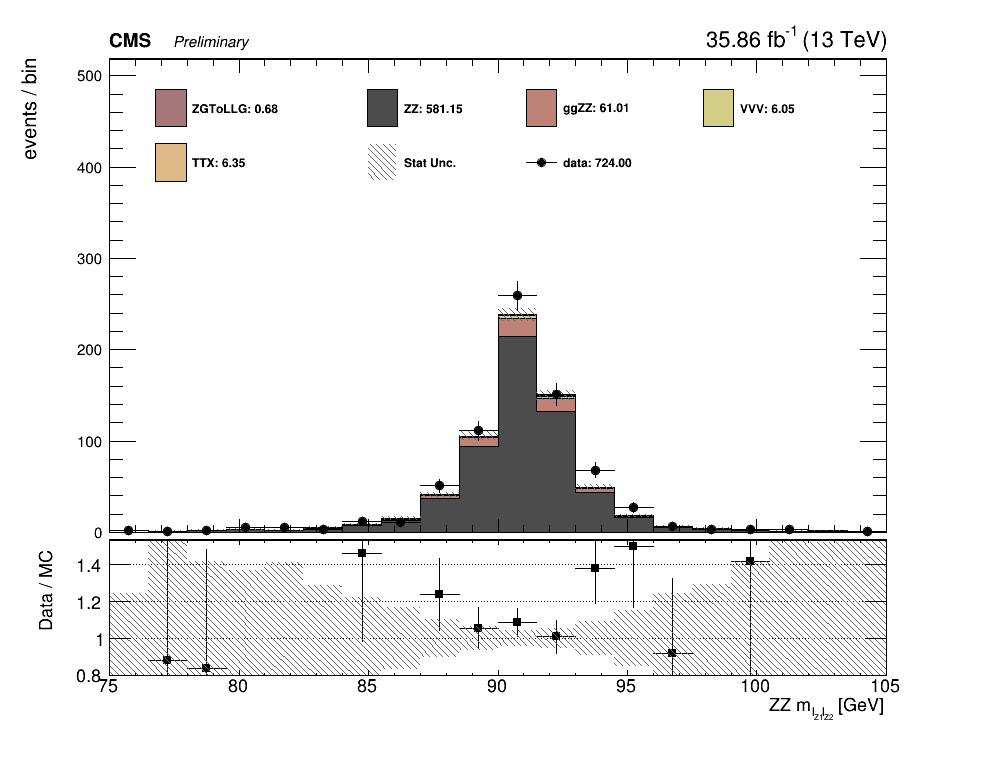

In [37]:
c1 = ROOT.TCanvas("","",1000,800)
MC_err = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
ggZZ_sum = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
VVV_sum  = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
TT_sum   = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])

SetHistStyle(ggZZ_sum, filelist_MC["ggZZ_4e"]["color"])
SetHistStyle(VVV_sum, filelist_MC["WWW"]["color"])
SetHistStyle(TT_sum, filelist_MC["TTZ"]["color"])

MC_err.Sumw2()
MC_err.SetFillColor(ROOT.kGray+2)
MC_err.SetFillStyle(3345)
MC_err.SetMarkerSize(0.)
MC_err.SetMarkerColor(ROOT.kGray+2)
MC_err.SetLineWidth(2)
MC_err.SetLineColor(0)
MC_err.SetStats(0)
MC_err.SetXTitle(f'{branch[plot_branch]["axis_name"]}')
MC_err.SetYTitle(f'events / bin')

stack_mc = ROOT.THStack("","")
#MC_err.Add(hist_FakeLep[plot_branch])
#stack_mc.Add(hist_FakeLep[plot_branch])
#MC_err.Add(hist_FakePho[plot_branch])
#stack_mc.Add(hist_FakePho[plot_branch])
for file in filelist_MC:
    if 'ggZZ' in file:
        ggZZ_sum.Add(filelist_MC[file]["hist"][plot_branch])
        continue
    
    if 'WZG' in file:
        continue
    
    if file in ['WWW','WWZ','WZZ','ZZZ']:
        VVV_sum.Add(filelist_MC[file]["hist"][plot_branch])
        continue
    
    if ('TT' in file) or ('tZq' in file) or ('ttH' in file):
        TT_sum.Add(filelist_MC[file]["hist"][plot_branch])
        continue
        
    stack_mc.Add(filelist_MC[file]["hist"][plot_branch])
    MC_err.Add(filelist_MC[file]["hist"][plot_branch])
    




#stack_mc.Add(filelist_MC['WZG']["hist"][plot_branch])
#MC_err.Add(filelist_MC['WZG']["hist"][plot_branch])




stack_mc.Add(ggZZ_sum)
MC_err.Add(ggZZ_sum)

stack_mc.Add(VVV_sum)
MC_err.Add(VVV_sum)

stack_mc.Add(TT_sum)
MC_err.Add(TT_sum)



legend = ROOT.TLegend(0.15, 0.65, 0.85, 0.85)
legend.SetNColumns(4)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
for file in filelist_MC:
    if 'ggZZ' in file:
        continue
    if 'WZG' in file:
        continue
    if file in ['WWW','WWZ','WZZ','ZZZ']:
        continue    
    if ('TT' in file) or ('tZq' in file) or ('ttH' in file):
        continue
    legend.AddEntry(filelist_MC[file]["hist"][plot_branch], f'{filelist_MC[file]["name"]}: {format(filelist_MC[file]["hist"][plot_branch].GetSumOfWeights(), ".2f")}','F')
    
#legend.AddEntry(filelist_MC["WZG"]["hist"][plot_branch], f'{filelist_MC["WZG"]["name"]}: {format(filelist_MC[file]["hist"][plot_branch].GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(ggZZ_sum,f'ggZZ: {format(ggZZ_sum.GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(VVV_sum,f'VVV: {format(VVV_sum.GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(TT_sum,f'TTX: {format(TT_sum.GetSumOfWeights(), ".2f")}', 'F')

#legend.AddEntry(hist_FakeLep[plot_branch],f'Nonprompt Lepton: {format(hist_FakeLep[plot_branch].GetSumOfWeights(), ".2f")}', 'F')
#legend.AddEntry(hist_FakePho[plot_branch],f'Nonprompt Photon: {format(hist_FakePho[plot_branch].GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(MC_err, 'Stat Unc.', 'F')
legend.AddEntry(hist_data[plot_branch], f'data: {format(hist_data[plot_branch].GetSumOfWeights(), ".2f")}')



c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

# draw everything
pad1.cd()
hist_data[plot_branch].Draw("ep")

hist_data[plot_branch].SetMaximum(MAXY)

hist_data[plot_branch].GetXaxis().SetLabelSize(0)

MC_err.SetMaximum(2.0 * MC_err.GetMaximum())
stack_mc.Draw("HIST SAME")
MC_err.Draw("e2 SAME")
hist_data[plot_branch].Draw("ep SAME")
legend.Draw("SAME")
# ROOT.gPad.SetLogy()
ROOT.gPad.RedrawAxis()


# h1.GetXaxis().SetLabelSize(0)
pad2.cd()
h3 = createRatio(hist_data[plot_branch], MC_err)
h4 = createRatio(MC_err, MC_err)
h3.Draw("ep")
h3.GetXaxis().SetRangeUser(10,60)
# h4.Draw("e2")
h4.Draw("e2 SAME")
ROOT.gPad.RedrawAxis()

CMS_lumi(pad1, 0, 0)
# c1.SaveAs('Fake_Lepton/MT_LooseMuon_dist_MR_2018.pdf')
print (time.time()-time_total_init)
